In [415]:
!python --version

Python 3.9.12


In [416]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import regex as re

In [417]:
# read csv file into a dataframe
df_richest = pd.read_csv('TopRichestInWorld.csv')


In [418]:
# list top 5 rows
df_richest.head()

,Name,NetWorth,Age,Country/Territory,Source,Industry
0,Elon Musk,"$219,000,000,000",50,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,"$171,000,000,000",58,United States,Amazon,Technology
2,Bernard Arnault & family,"$158,000,000,000",73,France,LVMH,Fashion & Retail
3,Bill Gates,"$129,000,000,000",66,United States,Microsoft,Technology
4,Warren Buffett,"$118,000,000,000",91,United States,Berkshire Hathaway,Finance & Investments


In [419]:
# list rows, then columns
df_richest.shape


(101, 6)

In [420]:
# list the column names
df_richest.columns

Index(['Name', 'NetWorth', 'Age', 'Country/Territory', 'Source', 'Industry'], dtype='object')

In [421]:
# list the column datatypes
df_richest.dtypes

Name                 object
NetWorth             object
Age                   int64
Country/Territory    object
Source               object
Industry             object
dtype: object

In [422]:
# get metadata in one command
df_richest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               101 non-null    object
 1   NetWorth           101 non-null    object
 2   Age                101 non-null    int64 
 3   Country/Territory  101 non-null    object
 4   Source             101 non-null    object
 5   Industry           101 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.9+ KB


In [423]:
# which industry had the most billionaires
industry = df_richest['Industry'].value_counts()
industry

Fashion & Retail         18
Technology               15
Finance & Investments    13
Metals & Mining           9
Food & Beverage           8
Automotive                7
Diversified               6
Manufacturing             5
Healthcare                5
Media & Entertainment     4
Real Estate               3
Telecom                   2
Logistics                 2
Energy                    2
Gambling & Casinos        1
Service                   1
Name: Industry, dtype: int64

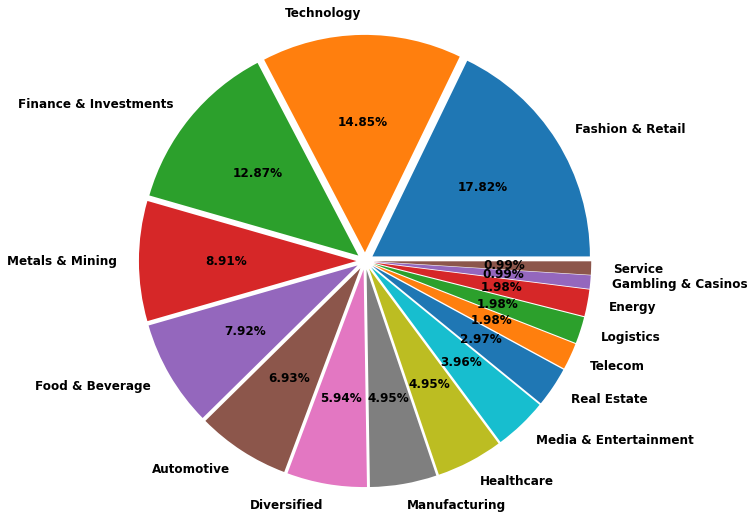

In [424]:
# Create a pie plot of the industries that had the most billionares with exploded pie sections
# create a piechart explosion variable as an empty python list
myexplode = []
# create a pandas series
s = df_richest['Industry'].value_counts()

# append the number if items in the series into the piechart explosion variable
for i in range(s.count()):
    myexplode.append(0.1)
    
industry.plot(kind='pie', autopct='%.2f%%',title=None, explode = myexplode, radius=2.5, label = '', 
              textprops={'fontsize':12, 'weight':'bold'})
plt.show()

In [425]:
# which country had the most billionares
country = df_richest['Country/Territory'].value_counts()
country

United States    37
China            18
India             7
Germany           7
France            7
Hong Kong         4
Japan             3
Australia         2
Russia            2
Indonesia         2
Italy             2
Canada            2
Mexico            2
Austria           1
Spain             1
Switzerland       1
Chile             1
Singapore         1
Sweden            1
Name: Country/Territory, dtype: int64

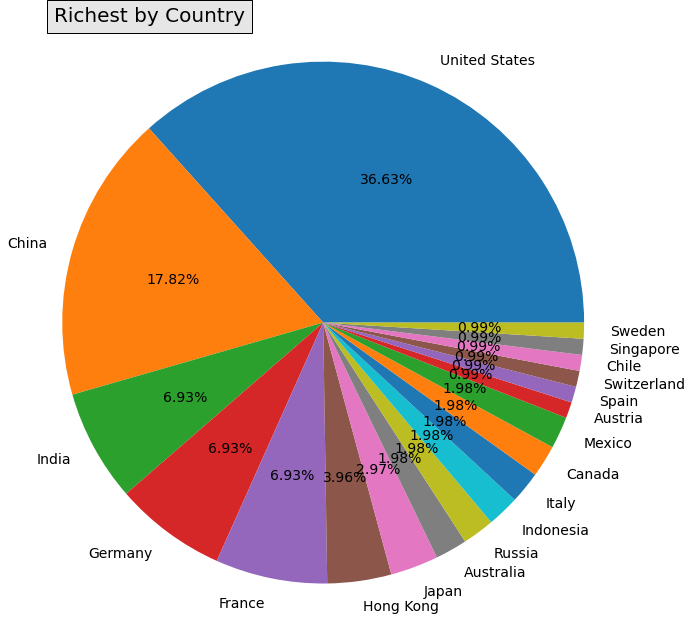

In [437]:
# pie plot of countries with billionaires with a title
country.plot(kind='pie', autopct='%.2f%%', radius=3, label='', textprops={'fontsize':14})
# May have to restart kernel after making changes to the below line
plt.title("Richest by Country", x=-0.3, fontdict={'fontsize':20},  pad=192, bbox={'facecolor':'0.9', 'pad':7})
plt.show()

In [438]:
# find which source developed the greatest number of billionaires
df_richest['Source'].value_counts()

Google            4
mining            4
hedge funds       4
Walmart           3
real estate       3
                 ..
Red Bull          1
eyeglasses        1
fashion retail    1
online games      1
chemicals         1
Name: Source, Length: 77, dtype: int64

In [439]:
df_richest['Age'].describe()

count    102.000000
mean      66.921569
std       13.966499
min       30.000000
25%       57.000000
50%       67.000000
75%       77.000000
max       94.000000
Name: Age, dtype: float64

In [440]:
# create a dataframe to add a row into the data base
# received warning that frame.append method is deprecated and should use concat
df_new_guy = pd.DataFrame([['babarehner', '$100,000', 47, 'United States', 'Google', 'Technology']], 
                          columns=['Name', 'NetWorth', 'Age', 'Country/Territory','Source', 'Industry'])
df_new_guy

,Name,NetWorth,Age,Country/Territory,Source,Industry
0,babarehner,"$100,000",47,United States,Google,Technology


In [441]:
# add new_guy dataframe to richest dataframe
df_richest = pd.concat([df_richest, df_new_guy], ignore_index=True)
df_richest.tail()

,Name,Billions,Age,Country/Territory,Source,Industry,NetWorth
98,Sun Piaoyang,17.1000,63,China,pharmaceuticals,Healthcare,NaN
99,Luo Liguo & family,17.0000,66,China,chemicals,Manufacturing,NaN
100,Peter Woo,17.0000,75,Hong Kong,real estate,Real Estate,NaN
101,babarehner,0.0001,47,United States,Google,Technology,NaN
102,babarehner,NaN,47,United States,Google,Technology,"$100,000"


In [442]:
# Remove the '$' sign in 'NetWorth' column
df_richest['NetWorth'] = df_richest['NetWorth'].replace('\$','', regex=True)
# Remove the ',' in the billions column
df_richest['NetWorth'] = df_richest['NetWorth'].replace(',','', regex=True)
# Change the 'NetWorth' column to float and remove all the divide by 1 billion
df_richest['NetWorth'] = (df_richest['NetWorth'].astype(float))/1e9
# Change the column name fro 'NetWorth' to 'Billions' in the printout
df_richest = df_richest.rename(columns={"NetWorth": "Billions"})

In [443]:
# Since 'NetWorth' aka 'Billions' is now a float we can do calculations on it
df_richest['Billions'].describe()

,Billions,Billions
count,102.000000,1.0000
mean,41.948040,0.0001
std,35.918514,NaN
min,0.000100,0.0001
25%,20.725000,0.0001
50%,27.350000,0.0001
75%,48.725000,0.0001
max,219.000000,0.0001


In [444]:
# find which 'Source' created the most billions
grp_series = df_richest.groupby(['Source'])['Billions'].sum().sort_values(ascending=False)
grp_series

TypeError: sort_values() missing 1 required positional argument: 'by'

In [ ]:
# Show all the 'Google' source members
grp = df_richest.groupby('Source')
df_google = grp.get_group('Google')
df_google

In [ ]:
# plot bar graph of how much each google billionaire is worth
df_google.plot( y='Billions', x='Name', kind='bar')
plt.show()

In [ ]:
# another way to get groups using lambda function
grp2 = df_richest.groupby('Source').apply(lambda x: x['Billions'].sum()).sort_values(ascending = False)
grp2